# KNN

#### The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset


In [2]:
df = pd.read_csv("C:\\Users\\pc\\Desktop\\Data Science\\MachineLearning\\Starts\\Social_Network_Ads.csv")

In [5]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
# Data Preparation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:

X = df.iloc[:, :-1].values       #Declaring feature matrix
y = df.iloc[:, -1].values        #Declaring target variable

### Splitting the dataset inot the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Builgin KNN on the Training SET

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p =2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Fitting decision tree on data

classifier = classifier.fit(X_train, y_train)

### Predicting the Test set result


In [14]:
y_pred = classifier.predict(X_test)

### Checking our Predtion
y_pred

## Making the Confusion Matrix
NOTE:

A confusion matrix can be used to visualize true and false positives and negatives. The rows of the matrix are the true classes of the instances, and the columns are the predicted classes of the instances.

When creating a confusion matrix it is important to understand and maintain a convention for which differentiating positive and negative label values. The usual convention is to call the 1 case positive and the 0 case negative.

[[64  4]
 [ 3 29]]


Text(0.5, 257.44, 'Predicted label')

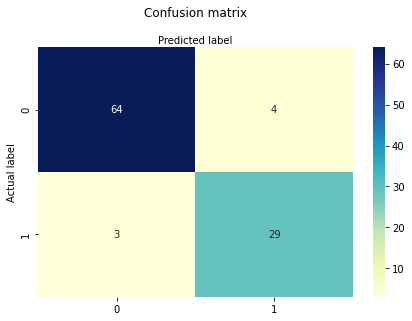

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Model Evaluation

In [20]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.93
Precision: 0.8787878787878788
Recall: 0.90625
f1: 0.8923076923076922


In [21]:
from sklearn import metrics

# View summary of common classification metrics

print("_____________METRRICS______________")

print(metrics.classification_report(y_true= y_test, y_pred= y_pred))

_____________METRRICS______________
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### ROC Curve

In [23]:
from sklearn.metrics import roc_curve, auc

# find the predicted probabilities using the test set

probs = classifier.predict_proba(X_test)
preds = probs[:,1]

# Find the FPR, TPR & Treshold
fpr, tpr, threshold = roc_curve(y_test, preds)

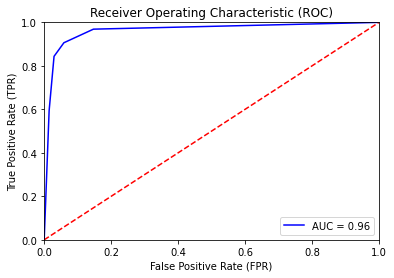

In [25]:
#---find the area under the curve---

roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()